Liczba znalezionych klastrów: 5
Liczba punktów odstających: 14


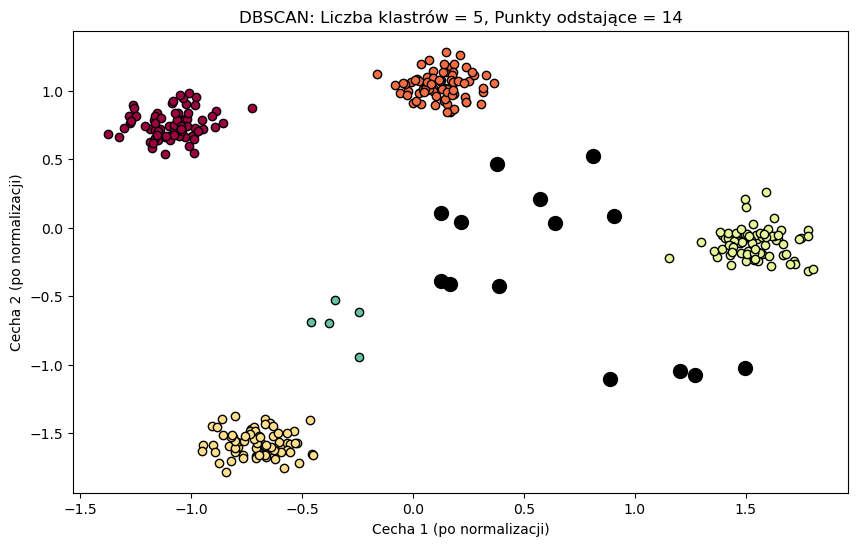

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1. Generowanie danych
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# 2. Dodanie punktów odstających
n_outliers = 20  # Liczba punktów odstających
outliers = np.random.uniform(low=[-6, -6], high=[6, 6], size=(n_outliers, 2))  # Punkty losowe poza głównymi skupiskami
X_with_outliers = np.vstack([X, outliers])  # Połączenie danych z punktami odstającymi

# 3. Normalizacja danych (opcjonalnie, ale zalecane dla DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_with_outliers)

# 4. Zastosowanie DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # eps to promień sąsiedztwa, min_samples to minimalna liczba punktów w sąsiedztwie
dbscan.fit(X_scaled)

# 5. Etykiety klastrów i identyfikacja punktów odstających
labels = dbscan.labels_

# Liczba klastrów (ignorując punkty odstające, oznaczone jako -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Liczba znalezionych klastrów: {n_clusters}")
print(f"Liczba punktów odstających: {n_noise}")

# 6. Wizualizacja wyników
plt.figure(figsize=(10, 6))

# Kolory dla klastrów
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Punkty odstające są zaznaczone na czarno
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Wizualizacja punktów w klastrze
    xy = X_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10 if k == -1 else 6)

plt.title(f"DBSCAN: Liczba klastrów = {n_clusters}, Punkty odstające = {n_noise}")
plt.xlabel("Cecha 1 (po normalizacji)")
plt.ylabel("Cecha 2 (po normalizacji)")
plt.show()